# CaLead Week 1

In [1]:
# Import the necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('Downloads/CaLead Week 1.xlsx')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,551004,2019-04-26,21843,Red Retrospot Cake Stand,31.56,1,12004.0,United Kingdom
1,551004,2019-04-26,22501,Picnic Basket Wicker Large,31.56,1,12004.0,United Kingdom
2,551004,2019-04-26,22171,3 Hook Photo Shelf Antique White,27.30,1,12004.0,United Kingdom
3,551004,2019-04-26,21257,Victorian Sewing Box Medium,26.43,1,12004.0,United Kingdom
4,551004,2019-04-26,22966,Gingerbread Man Cookie Cutter,12.77,1,12004.0,United Kingdom


## Data Cleaning

In [3]:
# Check for blank rows
df.isnull().sum()

#Observing the empty cells, you'll find that they all belong to the cancelled transactions

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [4]:
# Create a column named 'Status' to return 'Successful' for successful transactions and 'Cancelled' for cancelled transactions

# Use numpy's where function to create the new column 'status'
df['status'] = np.where(df['TransactionNo'].str.startswith('C', na=False), 'cancelled', 'successful')

# Display the resulting DataFrame
df.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,status
0,551004,2019-04-26,21843,Red Retrospot Cake Stand,31.56,1,12004.0,United Kingdom,successful
1,551004,2019-04-26,22501,Picnic Basket Wicker Large,31.56,1,12004.0,United Kingdom,successful
2,551004,2019-04-26,22171,3 Hook Photo Shelf Antique White,27.30,1,12004.0,United Kingdom,successful
3,551004,2019-04-26,21257,Victorian Sewing Box Medium,26.43,1,12004.0,United Kingdom,successful
4,551004,2019-04-26,22966,Gingerbread Man Cookie Cutter,12.77,1,12004.0,United Kingdom,successful


In [5]:
#Check for unique values in the status column

df['status'].unique()

array(['successful', 'cancelled'], dtype=object)

In [6]:
# Create a new column called 'TotalCost' which is a product of the price and quantity columns

df.insert(6, 'TotalCost', df['Price'] * df['Quantity'])

df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,TotalCost,CustomerNo,Country,status
0,551004,2019-04-26,21843,Red Retrospot Cake Stand,31.56,1,31.56,12004.0,United Kingdom,successful
1,551004,2019-04-26,22501,Picnic Basket Wicker Large,31.56,1,31.56,12004.0,United Kingdom,successful
2,551004,2019-04-26,22171,3 Hook Photo Shelf Antique White,27.30,1,27.30,12004.0,United Kingdom,successful
3,551004,2019-04-26,21257,Victorian Sewing Box Medium,26.43,1,26.43,12004.0,United Kingdom,successful
4,551004,2019-04-26,22966,Gingerbread Man Cookie Cutter,12.77,1,12.77,12004.0,United Kingdom,successful


In [7]:
# convert 'CustomerNo', 'TransactionNo', and 'ProductNo' to strings

df['TransactionNo'] = df['TransactionNo'].astype(str)
df['ProductNo'] = df['ProductNo'].astype(str)
df['CustomerNo'] = df['CustomerNo'].astype(str)

# Confirm conversion
df.dtypes

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
TotalCost               float64
CustomerNo               object
Country                  object
status                   object
dtype: object

In [9]:
# Replace the blank columns in the 'CustomerNo' column with 'C'

df['CustomerNo'] = df['CustomerNo'].fillna('C')

#Check

df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
TotalCost        0
CustomerNo       0
Country          0
status           0
dtype: int64

## EDA

In [10]:
# Check basic info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   TotalCost      536350 non-null  float64       
 7   CustomerNo     536350 non-null  object        
 8   Country        536350 non-null  object        
 9   status         536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 40.9+ MB


In [12]:
# Get summary statistics of numeric columns. Now, we are only focusing on successful transactions

df_successful = df[df['status'] == 'successful']

df_successful.describe()

,Price,Quantity,TotalCost
count,527765.000000,527765.000000,5.277650e+05
mean,12.629636,10.594674,1.193068e+02
std,7.933217,156.786646,1.851191e+03
min,5.130000,1.000000,5.130000e+00
25%,10.990000,1.000000,1.717000e+01
50%,11.940000,3.000000,4.383000e+01
75%,14.090000,11.000000,1.194000e+02
max,660.620000,80995.000000,1.002718e+06


In [13]:
# Since there is a Date column, we can extract insights over time by seetting the Date column as the index and resample or plot trends.
df_successful.set_index('Date', inplace=True)


In [15]:
# Correlation matrix

df_successful.corr()

## Question 1: Monthly Sales Trend

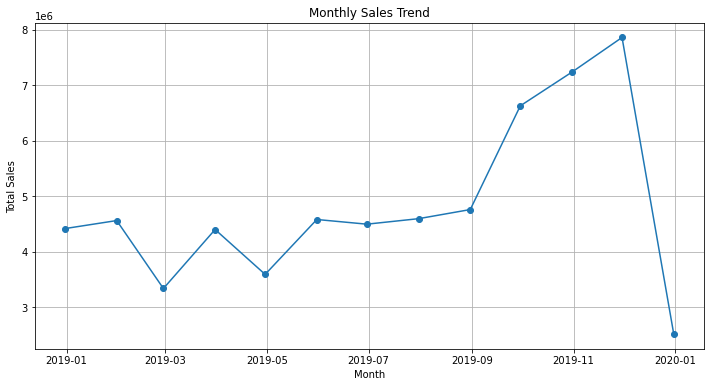

In [16]:
# Date' column is already set as the index
df_successful.index = pd.to_datetime(df_successful.index)

# Use the resample function to aggregate the data on a monthly basis
monthly_sales = df_successful['TotalCost'].resample('M').sum()

#plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

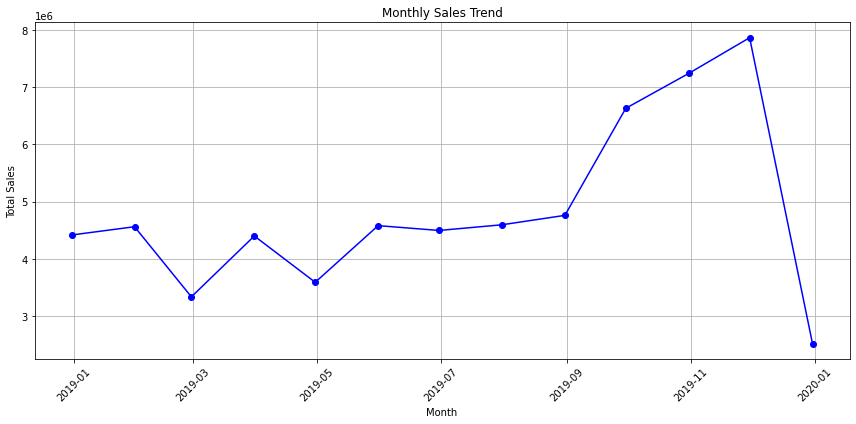

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [18]:
# Average monthly sales

monthly_sales.mean()

4843536.487692308

## Question 2: Most Frequently Purchased Products

In [22]:
most_frequent_products = df_successful['ProductName'].value_counts()

top20 = most_frequent_products.head(20)
top20

Cream Hanging Heart T-Light Holder    2336
Jumbo Bag Red Retrospot               2115
Regency Cakestand 3 Tier              2019
Party Bunting                         1708
Lunch Bag Red Retrospot               1597
Assorted Colour Bird Ornament         1491
Popcorn Holder                        1426
Set Of 3 Cake Tins Pantry Design      1399
Pack Of 72 Retrospot Cake Cases       1373
Lunch Bag Black Skull                 1329
Lunch Bag Suki Design                 1328
Natural Slate Heart Chalkboard        1263
Jumbo Bag Vintage Doily               1249
Jumbo Bag Pink Polkadot               1238
Heart Of Wicker Small                 1226
Paper Chain Kit 50'S Christmas        1200
Jumbo Storage Bag Suki                1197
Jumbo Shopper Vintage Red Paisley     1191
Lunch Bag Spaceboy Design             1179
Lunch Bag Cars Blue                   1174
Name: ProductName, dtype: int64

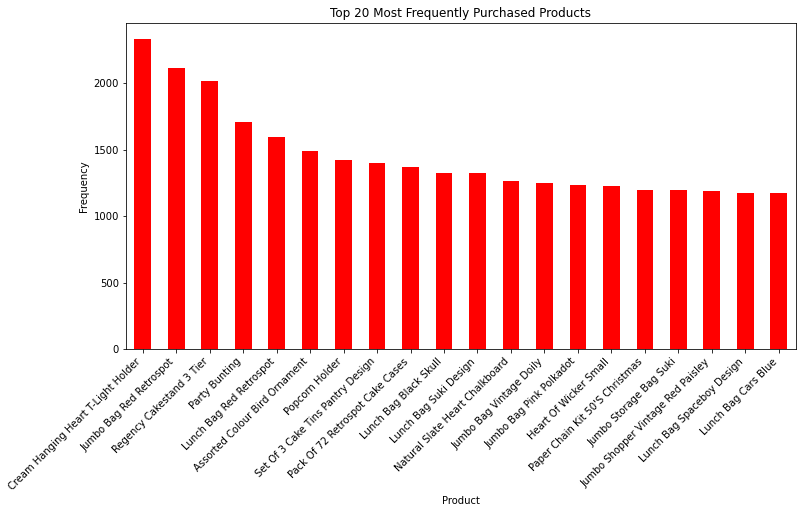

In [23]:
# plot a graph of the most frequently purchased products

plt.figure(figsize=(12,6))
top20.plot(kind='bar', color='red')
plt.title('Top 20 Most Frequently Purchased Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
bottom20 = most_frequent_products.tail(122)
bottom20

Paper Craft Little Birdie            1
Curious Images Scrap Book Set        1
Pink Polkadot Kids Bag               1
Blue Drop Earrings W Bead Cluster    1
Pink Feather Christmas Decoration    1
                                    ..
Large Heart Flowers Hook             1
Orange/Fuschia Stones Necklace       1
Pink Dolly Hair Clips                1
Glass Bead Hoop Necklace Black       1
Scallop Shell Soap Dish              1
Name: ProductName, Length: 122, dtype: int64

## Question 3: Quantity of Products in Each Transaction

In [41]:
quantity_per_transaction = df_successful.groupby('TransactionNo')['Quantity'].sum()
print(quantity_per_transaction.mean())
print(quantity_per_transaction.max())
print(quantity_per_transaction.min())

282.54158665992924
80995
1


In [45]:
# Find the total number of successful transactions

df_successful['TransactionNo'].nunique()

19790

In [46]:
quantity_per_transaction.head()

TransactionNo
536365    40
536366    12
536367    83
536368    15
536369     3
Name: Quantity, dtype: int64

## Most Profitable Customer Segments

In [47]:
# Calculate total revenue per customer

df_successful.groupby('CustomerNo')['TotalCost'].sum()

CustomerNo
12004.0     1509.60
12006.0       24.76
12008.0     5689.57
12013.0       69.96
12024.0      149.52
             ...   
18281.0      576.58
18282.0     1044.86
18283.0    12114.61
18287.0    18139.56
nan           82.00
Name: TotalCost, Length: 4719, dtype: float64

In [50]:
# Explore profitablility across countries

revenue_per_country = df_successful.groupby('Country')['TotalCost'].mean()
revenue_per_country

Country
Australia               610.427903
Austria                  78.220882
Bahrain                 189.815294
Belgium                 108.548815
Brazil                  150.073226
Canada                  203.272733
Channel Islands         154.729419
Cyprus                  108.240885
Czech Republic          319.768333
Denmark                 247.754877
EIRE                    219.471109
European Community      108.951404
Finland                 176.344242
France                  128.033570
Germany                 133.939772
Greece                  144.276567
Hong Kong               181.931373
Iceland                  48.693647
Israel                  153.473073
Italy                   125.859359
Japan                   869.897448
Lebanon                 126.496000
Lithuania               240.825882
Malta                    94.201704
Netherlands             925.001543
Norway                  203.465502
Poland                  114.411040
Portugal                 95.816322
RSA         

In [57]:
# Most Profitable Country

most_profitable_country = revenue_per_country.max()
revenue5 = revenue_per_country.sort_values(ascending=False)
revenue5

Country
Sweden                  984.999730
Netherlands             925.001543
Japan                   869.897448
Australia               610.427903
Czech Republic          319.768333
Singapore               295.260233
Denmark                 247.754877
Lithuania               240.825882
EIRE                    219.471109
Norway                  203.465502
Canada                  203.272733
Bahrain                 189.815294
Hong Kong               181.931373
United Arab Emirates    178.600896
Finland                 176.344242
Switzerland             157.172927
Channel Islands         154.729419
Israel                  153.473073
Brazil                  150.073226
Greece                  144.276567
Germany                 133.939772
France                  128.033570
Lebanon                 126.496000
Italy                   125.859359
USA                     123.103558
Spain                   117.775469
Poland                  114.411040
United Kingdom          109.936891
European Com

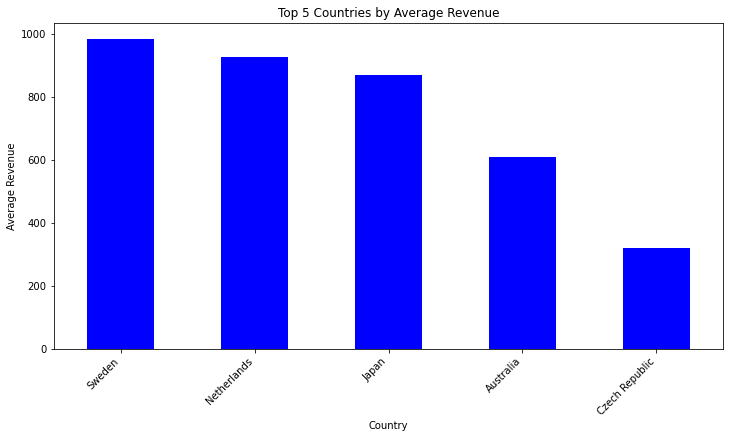

In [58]:
plt.figure(figsize=(12,6))
revenue5.head(5).plot(kind='bar', color = 'blue')
plt.title('Top 5 Countries by Average Revenue')
plt.xlabel('Country')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha ='right')
plt.show()